In [2]:
import os
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
def load_top_results_per_algo(folder_path, sort_by="test", top_n=100):
    """
    Load all result CSV files from a folder and return the top-N performing results per algorithm.

    Parameters:
        folder_path (str): Path to the folder containing result CSV files.
        sort_by (str): Column name to sort by (default: 'test').
        top_n (int): Number of top rows to return per algorithm (default: 10).

    Returns:
        pd.DataFrame: Top-N rows per algorithm, sorted by `sort_by` metric.
    """
    all_results = []

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)

            # Parse theta column if present
            for col in df.columns:
                if "theta" in col and "parsed" not in col:
                    df["theta_parsed"] = df[col].apply(ast.literal_eval)
                    break

            all_results.append(df)

    if not all_results:
        raise ValueError("No CSV files found in the specified folder.")

    full_df = pd.concat(all_results, ignore_index=True)

    # Top-N results per algorithm
    top_per_alg = (
        full_df.sort_values(by=sort_by, ascending=True)  # lower is better if it's loss
        .groupby("alg")
        .head(top_n)
        .reset_index(drop=True)
    )

    return top_per_alg


In [120]:
best_df = load_top_results_per_algo("./results", sort_by="test", top_n=50)
print(best_df["fitness_history"].iloc[0])

[-9830.26934796036, -10404.51244092203, -23558.096213156336, -44438.14171863116, -50970.18895913135, -56382.46037566892, -56382.46037566892, -56382.46037566892, -56382.46037566892, -56382.46037566892, -56382.46037566892, -56382.46037566892, -56382.46037566892, -56382.46037566892, -56382.46037566892, -56382.46037566892]


In [98]:
best_df

,alg,seed,train,test,theta,pop_size,gens,stalled_gens,tolerance,patience,fitness_history,time(seconds),theta_parsed
0,ABC,962,-56382.460376,-8715.674840,"[5.828558506265031, 2.2682425324336823, 0.05, ...",50,16,10,0.0001,10,"[-9830.26934796036, -10404.51244092203, -23558...",4.10,"[5.828558506265031, 2.2682425324336823, 0.05, ..."
1,ABC,784,-47422.631069,-8684.058276,"[5.726237696750832, 1.6608112726685442, 0.0558...",50,15,10,0.0001,10,"[-34893.566995970206, -34893.566995970206, -34...",3.82,"[5.726237696750832, 1.6608112726685442, 0.0558..."
2,ABC,830,-53961.666296,-8684.058276,"[6.234068567605634, 0.43177556394918015, 0.330...",50,21,10,0.0001,10,"[-7788.227269689354, -25033.907622279417, -407...",5.90,"[6.234068567605634, 0.43177556394918015, 0.330..."
3,GWO,68,-50141.231316,-8684.058276,"[5.520001809500798, 0.26336871939634027, 0.230...",50,22,10,0.0001,10,"[-9057.148207660506, -18769.765002810534, -187...",1.40,"[5.520001809500798, 0.26336871939634027, 0.230..."
4,PSO,37,-56656.637452,-8684.058276,"[5.725219965529158, 0.23404745680519312, 0.05,...",50,16,10,0.0001,10,"[-12640.215633823234, -14213.950795325221, -18...",1.60,"[5.725219965529158, 0.23404745680519312, 0.05,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,GWO,615,-54791.822855,-4966.415417,"[5.0, 0.3808543862350439, 0.07008989228655181,...",50,19,10,0.0001,10,"[-5781.2574442196665, -13172.55318689673, -190...",2.68,"[5.0, 0.3808543862350439, 0.07008989228655181,..."
196,GWO,856,-54791.822855,-4966.415417,"[5.0, 0.49784487798854277, 0.385498609535921, ...",50,16,10,0.0001,10,"[-5809.608558938892, -5809.608558938892, -7027...",2.21,"[5.0, 0.49784487798854277, 0.385498609535921, ..."
197,GWO,818,-54791.822855,-4966.415417,"[5.0, 0.04039924889742628, 0.10230542196100222...",50,24,10,0.0001,10,"[-3529.676633065022, -3769.613125797023, -9953...",3.36,"[5.0, 0.04039924889742628, 0.10230542196100222..."
198,GWO,447,-59288.814463,-4963.506229,"[3.7320448726337268, 1.609304634823922, 0.2085...",50,25,10,0.0001,10,"[-7597.535786952172, -16550.871776542328, -165...",1.60,"[3.7320448726337268, 1.609304634823922, 0.2085..."


In [ ]:
def plot_top_algo_comparison(top_df, metric="test"):
    """
    Visualize the top N results for each algorithm using a boxplot and stripplot.

    Parameters:
        top_df (pd.DataFrame): DataFrame of top-N results per algorithm.
        metric (str): Metric column to visualize (default: 'test').
    """
    if metric not in top_df.columns:
        raise ValueError(f"Metric '{metric}' not found in DataFrame.")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="alg", y=metric, data=top_df, palette="Set2", showfliers=False)
    sns.stripplot(x="alg", y=metric, data=top_df, color="black", size=5, jitter=True, alpha=0.7)

    plt.title(f"Top {top_df["alg"].value_counts().iloc[0]} {metric.capitalize()} Scores per Algorithm")
    plt.ylabel(f"{metric.capitalize()} Score")
    plt.xlabel("Algorithm")
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()  

/var/folders/rv/x7cnkh7d7sj0py4d4bp9vbbw0000gn/T/ipykernel_84087/1150322175.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="alg", y=metric, data=top_df, palette="Set2", showfliers=False)


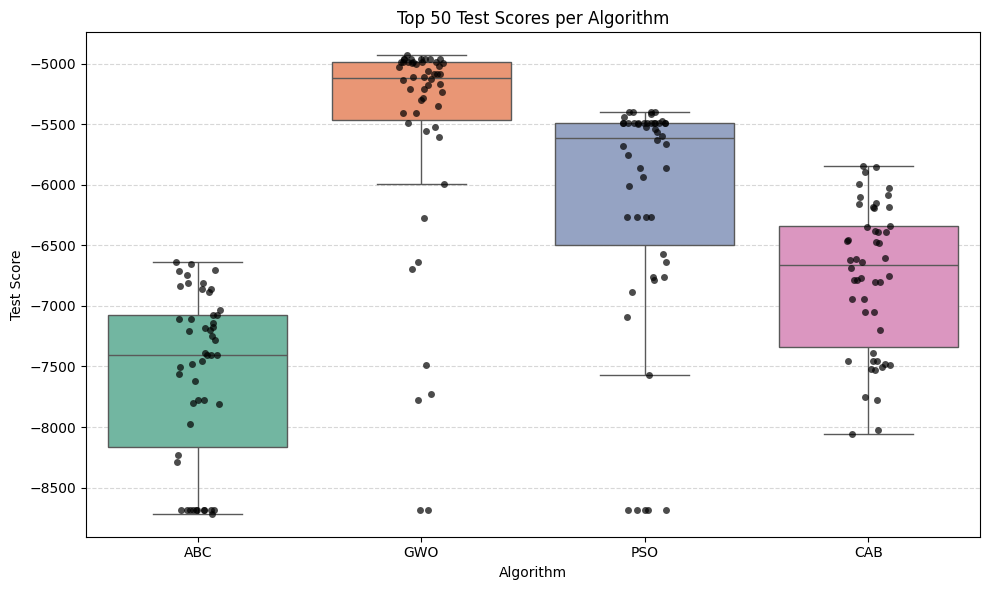

In [99]:
plot_top_algo_comparison(best_df, metric="test")

In [110]:
def plot_gens_boxplot_with_strip(df):
    """
    Create a boxplot + stripplot of generation counts per algorithm.

    Parameters:
        df (pd.DataFrame): Must include 'alg' and 'gens' columns,
                           ideally multiple entries per algorithm (e.g., top 10).
    """
    if not {"alg", "gens"}.issubset(df.columns):
        raise ValueError("DataFrame must contain 'alg' and 'gens' columns.")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="alg", y="gens", data=df, palette="Set2", showfliers=False)
    sns.stripplot(x="alg", y="gens", data=df, color="black", size=5, jitter=True, alpha=0.7)

    plt.title("Distribution of Best Generation Counts per Algorithm")
    plt.xlabel("Algorithm")
    plt.ylabel("Generations")
    plt.grid(axis='y', linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


/var/folders/rv/x7cnkh7d7sj0py4d4bp9vbbw0000gn/T/ipykernel_84087/1991415360.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="alg", y="gens", data=df, palette="Set2", showfliers=False)


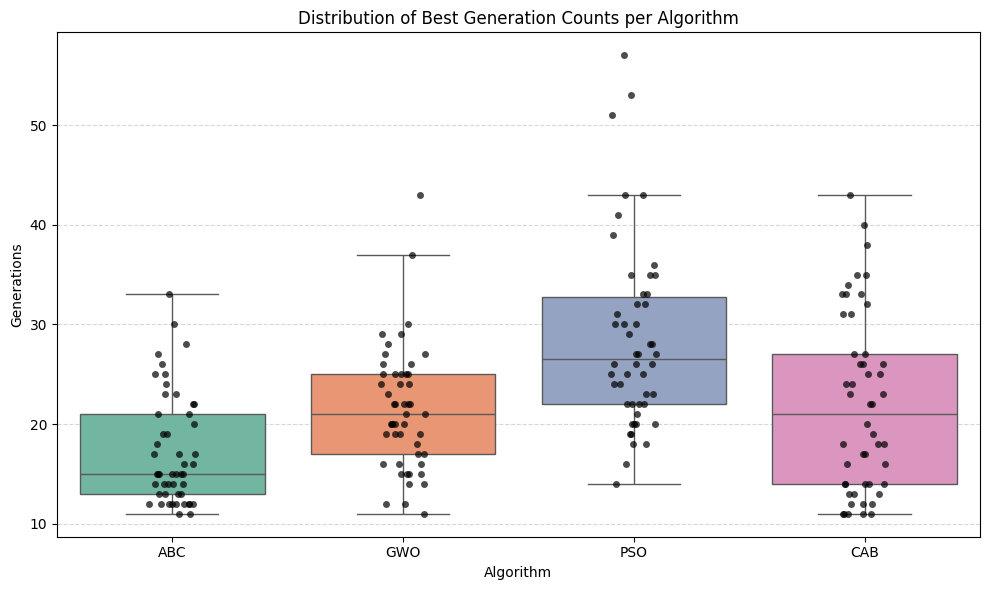

In [111]:
plot_gens_boxplot_with_strip(best_df)

In [84]:
gwo_only = best_df[best_df["alg"] == "GWO"]
cab_only = best_df[best_df["alg"] == "CAB"]
abc_only = best_df[best_df["alg"] == "ABC"]
pso_only = best_df[best_df["alg"] == "PSO"]

In [85]:
print(gwo_only)

     alg  seed         train         test  \
2    GWO    68 -50141.231316 -8684.058276   
10   GWO   750 -54218.626484 -8684.058276   
23   GWO   100 -48517.278477 -7779.123947   
25   GWO   997 -48270.700171 -7727.294651   
33   GWO    13 -50124.045664 -7489.684648   
77   GWO   588 -43504.258559 -6692.856741   
80   GWO   840 -52241.332216 -6640.731009   
95   GWO   946 -42234.084104 -6273.946145   
105  GWO    23 -72504.696678 -5992.485595   
109  GWO   486 -72255.314366 -5607.617972   
110  GWO   975 -59493.508827 -5559.884241   
111  GWO   569 -27205.157268 -5526.311934   
112  GWO   237 -59434.271490 -5489.592406   
113  GWO   609 -39181.976912 -5405.171382   
114  GWO   568 -38220.304728 -5405.171382   
115  GWO   353 -79417.056697 -5354.210969   
116  GWO   277 -53407.529967 -5297.547462   
117  GWO   158 -53448.911207 -5280.485722   
118  GWO   909 -56995.605216 -5237.117766   
119  GWO   374 -35681.045756 -5213.010133   
120  GWO   877 -38663.241173 -5207.989677   
121  GWO  

In [86]:
def plot_theta_distribution(df, theta_col="theta_parsed", alg_filter=None):
    """
    Plot distribution of each theta parameter in a DataFrame, rounding integer-like parameters.

    Parameters:
        df (pd.DataFrame): DataFrame with a theta_parsed column (list of floats).
        theta_col (str): Name of the column with parsed theta lists.
        alg_filter (str or list, optional): Filter to specific algorithms if provided.
    """
    if alg_filter is not None:
        df = df[df["alg"].isin([alg_filter] if isinstance(alg_filter, str) else alg_filter)]

    theta_labels = [
        "d1 (fast window)",
        "t1 (fast type)",
        "α1 (fast alpha)",
        "d2 (slow window)",
        "t2 (slow type)",
        "α2 (slow alpha)",
        "buy_delay",
        "sell_delay"
    ]

    theta_matrix = np.vstack(df[theta_col].values)
    n_params = theta_matrix.shape[1]

    # Apply rounding to integer-like dimensions
    rounded = theta_matrix.copy()
    round_indices = [0, 1, 3, 4, 6, 7]  # indices of int-based parameters
    rounded[:, round_indices] = np.round(rounded[:, round_indices])

    fig, axes = plt.subplots(nrows=(n_params + 2) // 3, ncols=3, figsize=(15, 4 * ((n_params + 2) // 3)))
    axes = axes.flatten()

    for i in range(n_params):
        label = theta_labels[i] if i < len(theta_labels) else f"Theta[{i}]"
        sns.histplot(rounded[:, i], bins=20, ax=axes[i], kde=True, color="skyblue", edgecolor="black")
        axes[i].set_title(f"{label} Distribution")
        axes[i].set_xlabel(label)
        axes[i].set_ylabel("Count")

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.suptitle("Theta Parameter Distributions", fontsize=16)
    plt.tight_layout()
    plt.show()


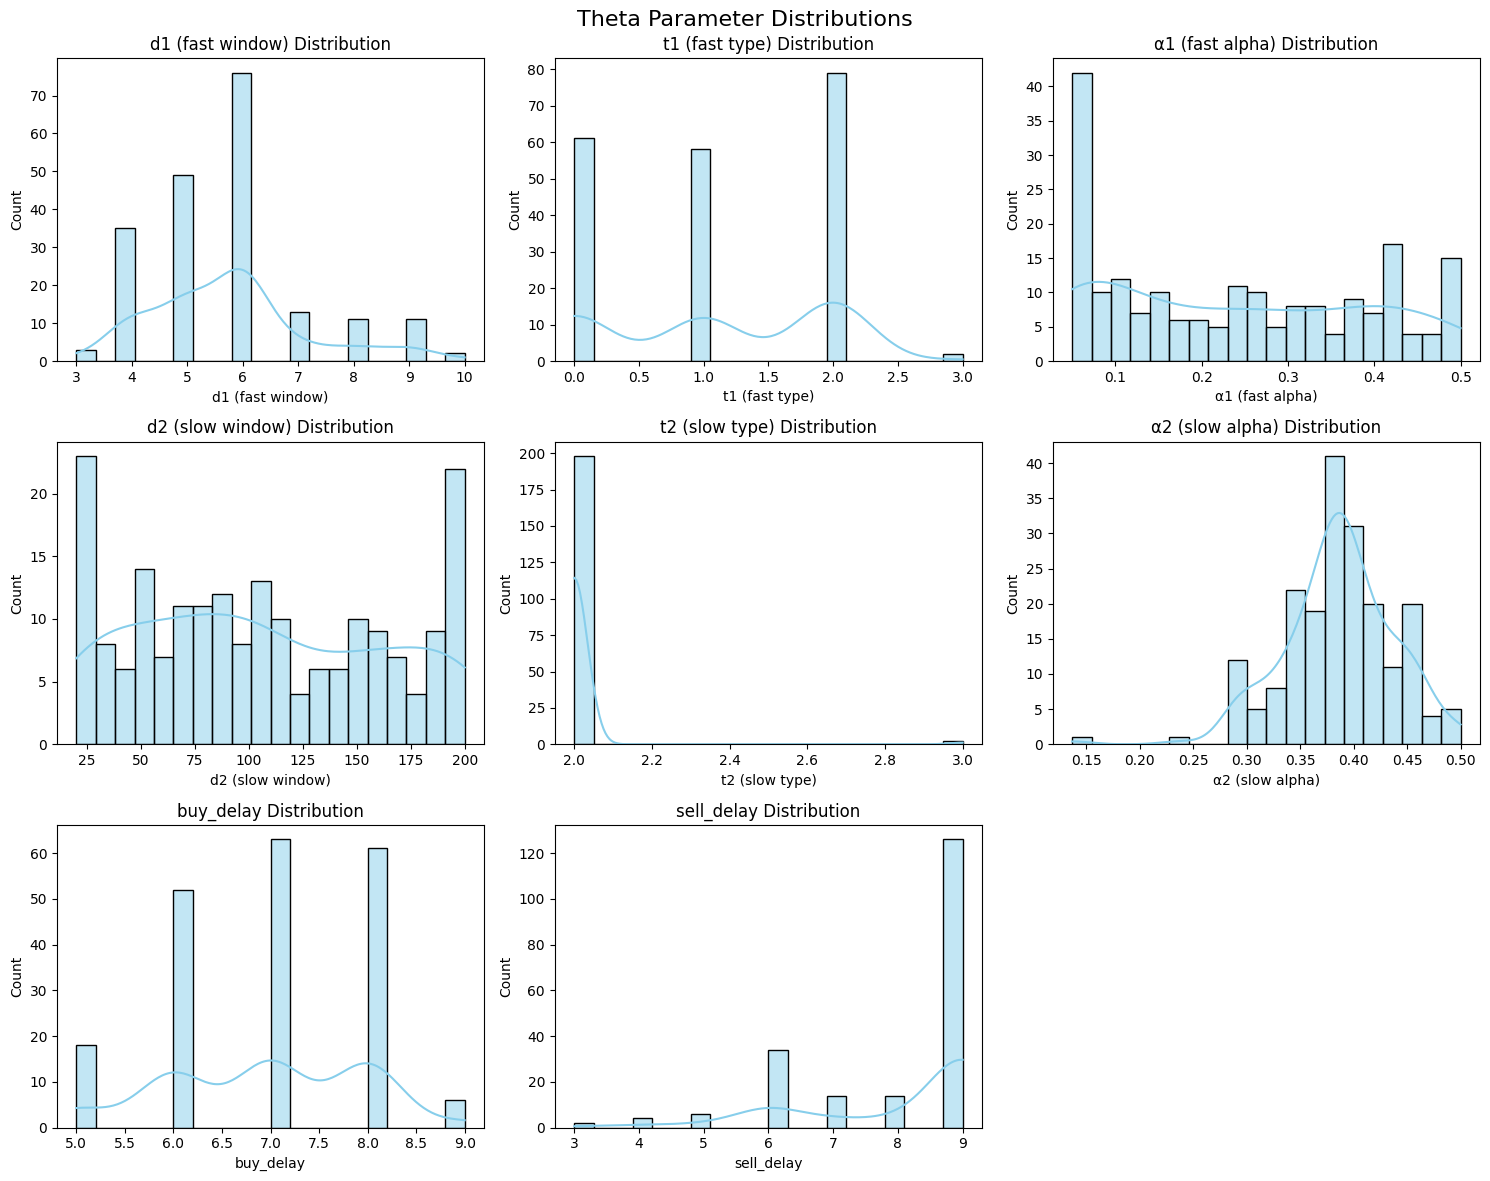

In [102]:
plot_theta_distribution(best_df)

In [134]:
def plot_fitness_insights(best_df, sort_by="test"):
    """
    Generate multiple visual insights for best fitness histories per algorithm.

    Parameters:
        best_df (pd.DataFrame): DataFrame with 'alg', 'fitness_history', and the sort metric.
        sort_by (str): Column used to identify the best row per algorithm.
    """
    # Parse fitness_history if stored as a string
    if isinstance(best_df["fitness_history"].iloc[0], str):
        best_df = best_df.copy()
        best_df["fitness_history"] = best_df["fitness_history"].apply(ast.literal_eval)

    # Get best run per algorithm
    best_per_alg = (
        best_df.sort_values(by=sort_by, ascending=True)
               .groupby("alg")
               .first()
               .reset_index()
    )

    # 1. Smoothed & Normalized Line Plot
    plt.figure(figsize=(10, 5))
    for _, row in best_per_alg.iterrows():
        history = pd.Series(row["fitness_history"])
        smoothed = history.rolling(window=3, min_periods=1).mean()
        normalized = smoothed - smoothed.iloc[0]
        plt.plot(normalized, label=row["alg"])
    plt.title("Smoothed, Normalized Fitness Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Δ Fitness (from Gen 0)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # 2. Final Fitness Bar Chart
    plt.figure(figsize=(8, 5))
    final_fitness = [row["fitness_history"][-1] for _, row in best_per_alg.iterrows()]
    algos = best_per_alg["alg"]
    bars = plt.bar(algos, final_fitness, color="skyblue", edgecolor="black")
    for bar, val in zip(bars, final_fitness):
        plt.text(bar.get_x() + bar.get_width()/2, val, f"{val:.1f}", ha='center', va='bottom')
    plt.title("Final Fitness Score per Algorithm")
    plt.ylabel("Final Fitness")
    plt.grid(axis='y', linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    # 3. Area Plot of Convergence
    plt.figure(figsize=(10, 5))
    for _, row in best_per_alg.iterrows():
        history = row["fitness_history"]
        generations = np.arange(len(history))
        plt.fill_between(generations, history, alpha=0.2)
        plt.plot(generations, history, label=row["alg"])
    plt.title("Convergence Behavior by Algorithm")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # 4. Table Summary
    summary_data = []
    for _, row in best_per_alg.iterrows():
        history = row["fitness_history"]
        delta = history[0] - history[-1]
        summary_data.append({
            "Algorithm": row["alg"],
            "Final Fitness": round(history[-1], 2),
            "Best Gen": int(np.argmin(history)),
            "Convergence Δ": round(delta, 2),
            "Runtime (s)": round(row.get("time(seconds)", np.nan), 2)
        })
    summary_df = pd.DataFrame(summary_data)
    return summary_df



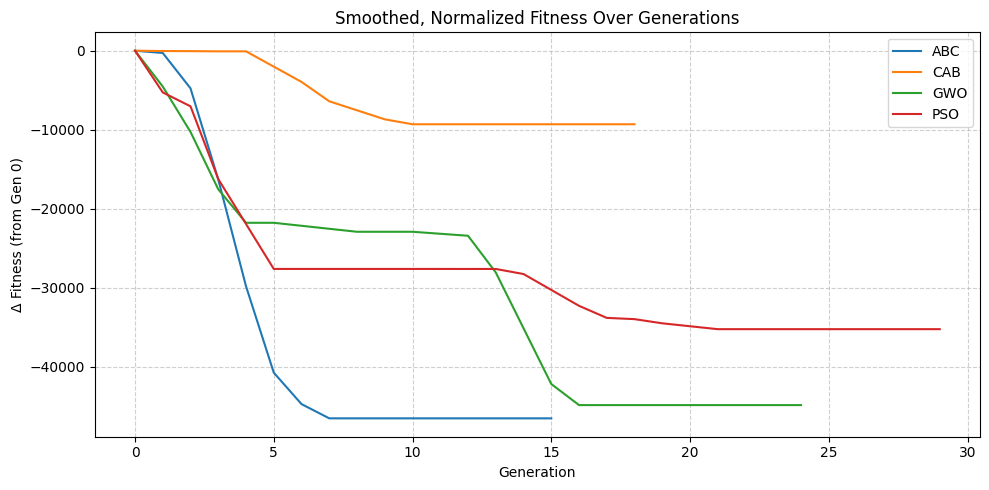

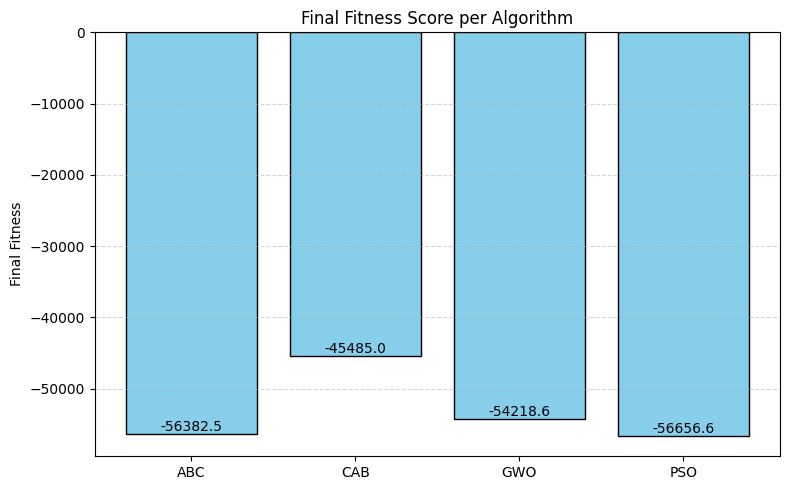

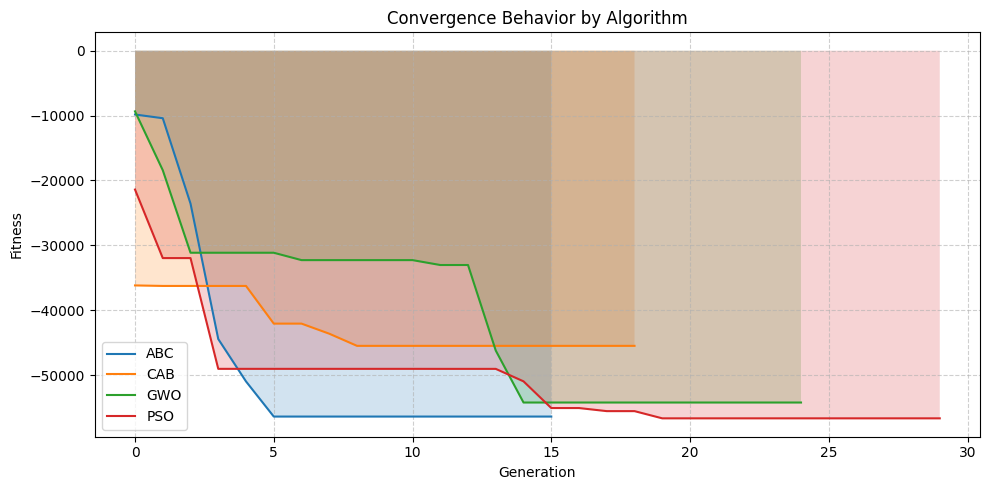

,Algorithm,Final Fitness,Best Gen,Convergence Δ,Runtime (s)
0,ABC,-56382.46,5,46552.19,4.10
1,CAB,-45484.99,8,9313.08,1.58
2,GWO,-54218.63,14,44873.98,1.95
3,PSO,-56656.64,19,35260.14,2.91


In [135]:
plot_fitness_insights(best_df)

In [141]:
def plot_radar_chart(df, alg_column="alg", metrics=None, normalize=True, top_n=5, sort_by="convergence_delta", alg_list=None):
    """
    Plot a radar/spider chart for a subset of algorithms comparing several metrics.

    Parameters:
        df (pd.DataFrame): DataFrame containing algorithm and metric columns.
        alg_column (str): Name of the column containing algorithm names.
        metrics (list): List of metric columns to include. If None, select all numeric columns.
        normalize (bool): Whether to normalize metrics (0-1 scale).
        top_n (int): Number of algorithms to plot based on sort_by metric.
        sort_by (str): Metric to rank algorithms by (descending).
        alg_list (list): Optional list of specific algorithm names to plot.
    """
    if metrics is None:
        metrics = df.select_dtypes(include=[np.number]).columns.difference([alg_column]).tolist()

    # Optionally filter to top_n or specific algos
    if alg_list:
        plot_data = df[df[alg_column].isin(alg_list)].copy()
    else:
        plot_data = df.sort_values(by=sort_by, ascending=False).groupby(alg_column).first().sort_values(by=sort_by, ascending=False).head(top_n).reset_index()

    if normalize:
        for col in metrics:
            min_val = plot_data[col].min()
            max_val = plot_data[col].max()
            if max_val != min_val:
                plot_data[col] = (plot_data[col] - min_val) / (max_val - min_val)
            else:
                plot_data[col] = 0.5  # neutral if constant

    categories = metrics
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(9, 9))
    ax = plt.subplot(111, polar=True)

    for _, row in plot_data.iterrows():
        values = row[metrics].tolist()
        values += values[:1]
        label = row[alg_column]
        ax.plot(angles, values, label=label)
        ax.fill(angles, values, alpha=0.1)

    ax.set_title(f"Radar Chart: Top {top_n} Algorithms by {sort_by}", y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_yticks([0.2, 0.5, 0.8])
    ax.set_yticklabels(["0.2", "0.5", "0.8"])
    ax.grid(True)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=9)
    plt.tight_layout()
    plt.show()



def compute_advanced_metrics(df, tolerance_col="tolerance", patience_col="patience"):
    """
    Compute advanced metrics for each row in a results DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame with columns including 'fitness_history', 'train', 'test', 'time(seconds)', etc.

    Returns:
        pd.DataFrame: A new DataFrame with advanced insight columns appended.
    """
    metrics = []

    for _, row in df.iterrows():
        # Parse fitness history
        history = row["fitness_history"]
        if isinstance(history, str):
            history = ast.literal_eval(history)
        history = np.array(history)

        # Basic metrics
        convergence_delta = history[0] - history[-1]
        best_gen = int(np.argmin(history))
        num_gens = len(history)
        stalled_correct = (row["gens"] <= best_gen + row[patience_col]) if patience_col in row and best_gen is not None else np.nan
        time_sec = row.get("time(seconds)", np.nan)

        # Generalisation
        generalisation_gap = row["train"] - row["test"]

        # Fitness gain per second
        gain_per_sec = convergence_delta / time_sec if time_sec else np.nan

        # Monotonicity score
        improvements = np.sum(np.diff(history) < 0)
        monotonicity_ratio = improvements / (len(history) - 1)

        # Convergence speed (gen where improvement slows)
        diffs = np.abs(np.diff(history))
        tol = row.get(tolerance_col, 1e-6)
        try:
            convergence_speed = int(np.argmax(diffs < tol))
        except:
            convergence_speed = np.nan

        # Post-best stability
        tail_stability = np.std(history[best_gen:]) if best_gen < len(history) else np.nan

        metrics.append({
            "alg": row["alg"],
            "seed": row["seed"],
            "best_gen": best_gen,
            "final_fitness": history[-1],
            "convergence_delta": convergence_delta,
            "convergence_speed": convergence_speed,
            "generalisation_gap": generalisation_gap,
            "monotonicity_ratio": monotonicity_ratio,
            "gain_per_sec": gain_per_sec,
            "tail_stability": tail_stability,
            "stalled_correct": stalled_correct,
            "runtime(s)": time_sec
        })

    return pd.DataFrame(metrics)



In [139]:
advanced_metrics_df = compute_advanced_metrics(best_df)

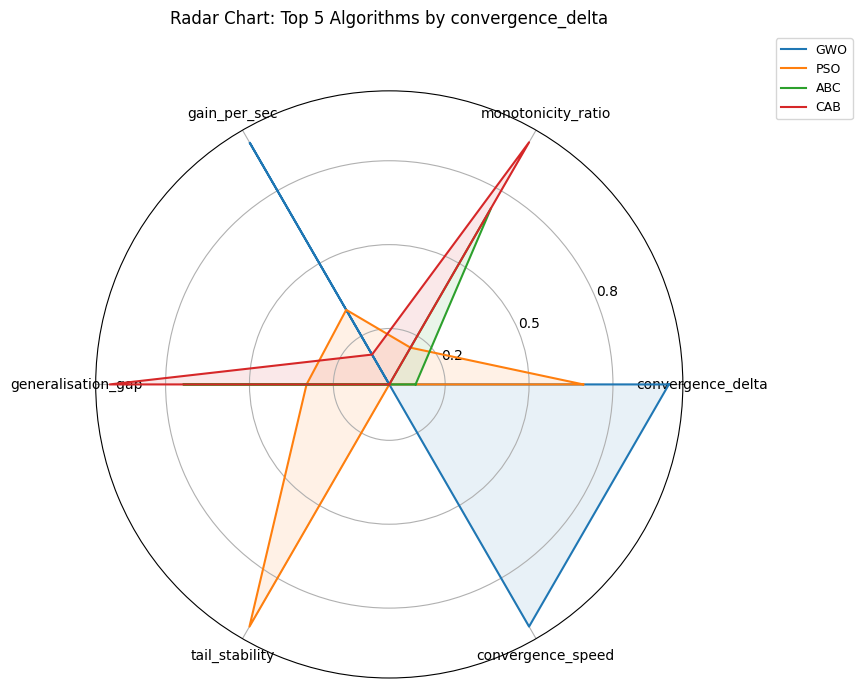

In [142]:
# Run the radar chart
plot_radar_chart(advanced_metrics_df, metrics=[
    "convergence_delta", "monotonicity_ratio", "gain_per_sec",
    "generalisation_gap", "tail_stability", "convergence_speed"
])


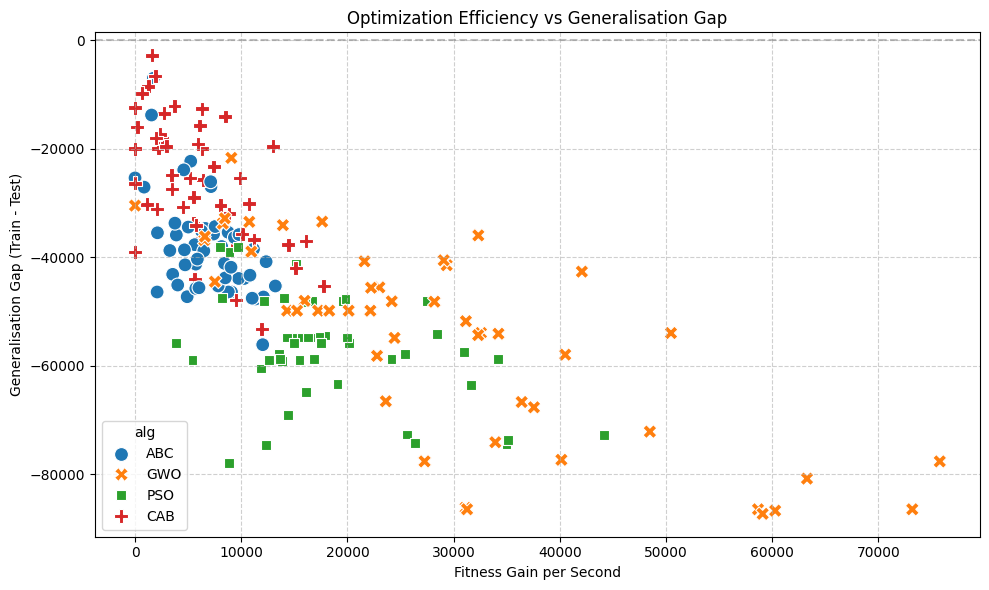

/var/folders/rv/x7cnkh7d7sj0py4d4bp9vbbw0000gn/T/ipykernel_84087/2500772833.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="alg", y="convergence_speed", palette="Set2")


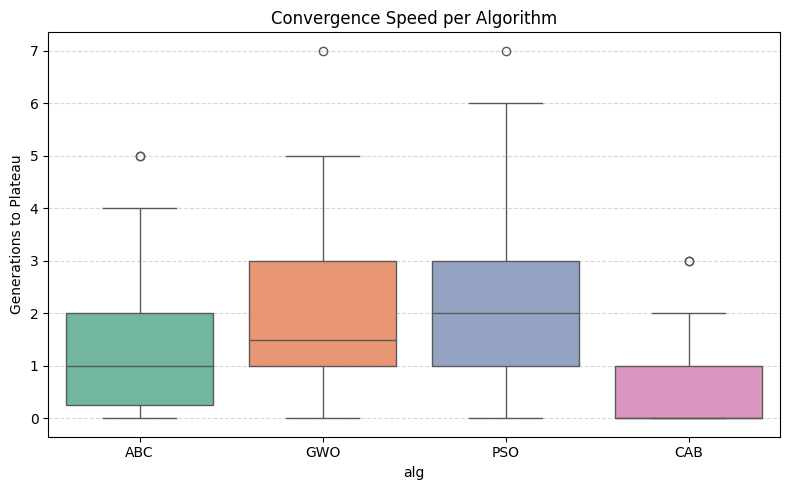

/var/folders/rv/x7cnkh7d7sj0py4d4bp9vbbw0000gn/T/ipykernel_84087/2500772833.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="alg", y="monotonicity_ratio", palette="Set3")


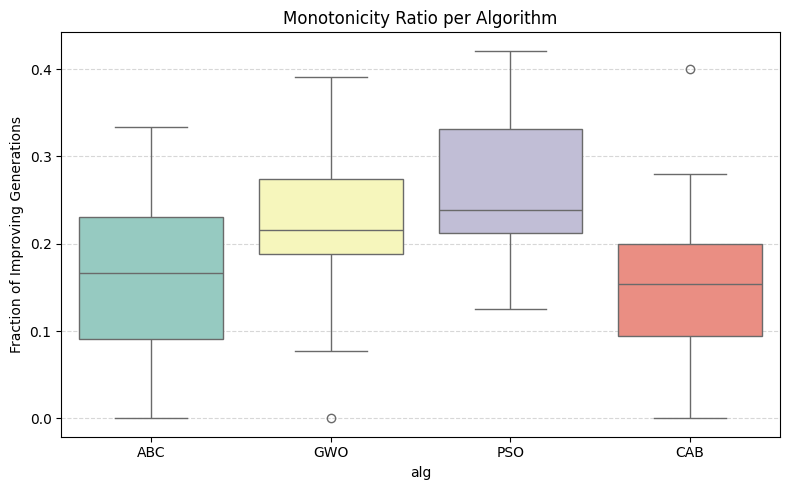

/var/folders/rv/x7cnkh7d7sj0py4d4bp9vbbw0000gn/T/ipykernel_84087/2500772833.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="alg", y="convergence_delta", ci=None, palette="pastel")
/var/folders/rv/x7cnkh7d7sj0py4d4bp9vbbw0000gn/T/ipykernel_84087/2500772833.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="alg", y="convergence_delta", ci=None, palette="pastel")


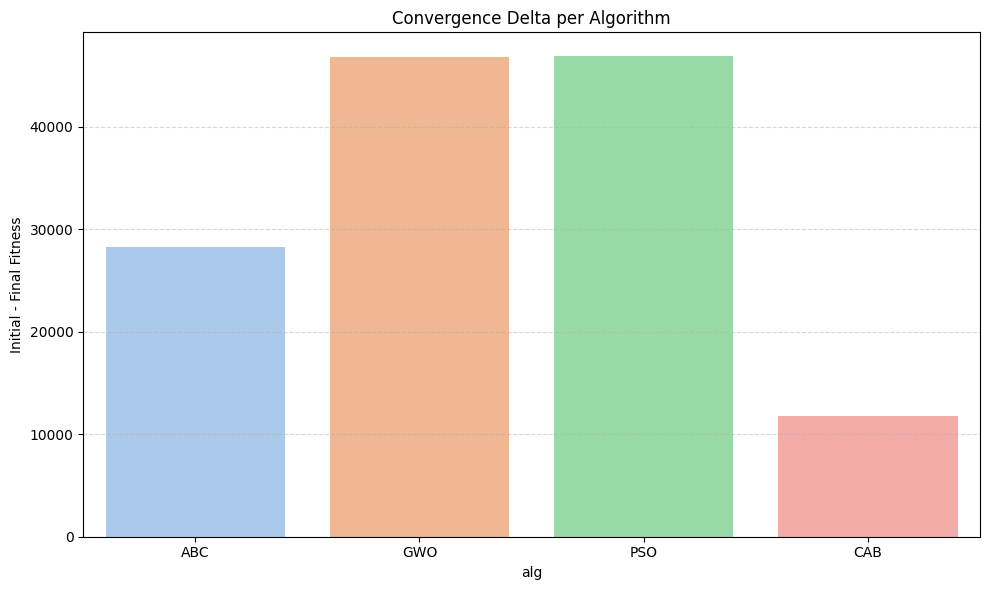

In [ ]:
def plot_advanced_insights(df):
    """
    Create visualizations from advanced optimizer metrics DataFrame.
    Includes:
    - Scatter plot of gain_per_sec vs generalisation_gap
    - Boxplots of convergence speed and monotonicity ratio
    - Bar plot of convergence delta
    """
    # Scatter plot: Efficiency vs Generalisation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="gain_per_sec", y="generalisation_gap", hue="alg", style="alg", s=100)
    plt.axhline(0, linestyle="--", color="grey", alpha=0.5)
    plt.title("Optimization Efficiency vs Generalisation Gap")
    plt.xlabel("Fitness Gain per Second")
    plt.ylabel("Generalisation Gap (Train - Test)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Boxplot: Convergence Speed
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="alg", y="convergence_speed", palette="Set2")
    plt.title("Convergence Speed per Algorithm")
    plt.ylabel("Generations to Plateau")
    plt.grid(True, axis='y', linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Boxplot: Monotonicity Ratio
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="alg", y="monotonicity_ratio", palette="Set3")
    plt.title("Monotonicity Ratio per Algorithm")
    plt.ylabel("Fraction of Improving Generations")
    plt.grid(True, axis='y', linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Bar Plot: Convergence Delta
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="alg", y="convergence_delta", ci=None, palette="pastel")
    plt.title("Convergence Delta per Algorithm")
    plt.ylabel("Initial - Final Fitness")
    plt.grid(True, axis='y', linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
# Run the visualizations
plot_advanced_insights(advanced_metrics_df)